# Melbourne Housing Price
This is my attempt to predict house prices in Melbourne for the competition held by **Monash Data Science Society**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 1. Understanding the dataset

In [2]:
df = pd.read_csv('house_prices.csv')
print(df.shape)
df.head()

(10582, 16)


,HouseID,Suburb,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
0,1,Reservoir,3,h,810000.0,Nelson,28/08/2016,11.2,3073,2,2,279,NaN,NaN,Northern Metropolitan,21650
1,2,Moonee Ponds,2,h,801000.0,Brad,23/04/2016,6.9,3039,1,0,133,NaN,NaN,Western Metropolitan,6232
2,3,Bellfield,3,h,1110000.0,Haughton,6/05/2017,9.5,3081,1,2,730,NaN,NaN,Eastern Metropolitan,790
3,4,Brunswick West,3,h,1300000.0,Nelson,27/05/2017,5.2,3055,1,3,484,NaN,NaN,Northern Metropolitan,7082
4,5,Sunshine North,3,h,905000.0,Douglas,27/05/2017,10.5,3020,1,4,697,NaN,NaN,Western Metropolitan,4217


In [3]:
df.describe()

,HouseID,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
count,10582.000000,10582.000000,5.291000e+03,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,5612.000000,6475.000000,10582.000000
mean,5291.500000,2.871763,1.138754e+06,9.192534,3099.427613,1.507277,1.553582,496.014742,144.104074,1962.866564,7438.955679
std,3054.904608,0.956821,7.056830e+05,4.748716,74.309764,0.688445,0.943900,1482.753318,138.418479,38.170383,4371.698320
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,389.000000
25%,2646.250000,2.000000,6.767500e+05,5.900000,3044.000000,1.000000,1.000000,152.000000,90.000000,1940.000000,4380.000000
50%,5291.500000,3.000000,9.450000e+05,8.800000,3081.000000,1.000000,1.000000,374.000000,123.000000,1970.000000,6543.000000
75%,7936.750000,3.000000,1.400000e+06,11.800000,3146.000000,2.000000,2.000000,633.000000,170.000000,1998.500000,10331.000000
max,10582.000000,8.000000,8.000000e+06,47.400000,3977.000000,8.000000,10.000000,76000.000000,6791.000000,2018.000000,21650.000000


In [4]:
len(df.Suburb.unique())

285

There are 285 unique suburbs, applying One Hot Encoder to this column will yield 285 dummy features.

I feel like this is going to be too many features for the learning models. Another way of processing this column is by encoding each suburb to its corresponding *latitude* and *longitude*.

In [5]:
df.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Eastern Metropolitan', 'Southern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Western Victoria', 'Northern Victoria'], dtype=object)

### Know which columns contain Nan values

In [6]:
pd.isnull(df).sum()

HouseID             0
Suburb              0
Rooms               0
Type                0
Price            5291
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     4970
YearBuilt        4107
Regionname          0
Propertycount       0
dtype: int64

In [7]:
pd.isnull(df[df['YearBuilt'].isnull()]).sum()

HouseID             0
Suburb              0
Rooms               0
Type                0
Price             190
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     3881
YearBuilt        4107
Regionname          0
Propertycount       0
dtype: int64

There are a lot of records which do not have BuildingArea and YearBuilt, and they are mostly houses that are in the training dataset!

**Should they be EXCLUDED??**

### Density plot of house prices

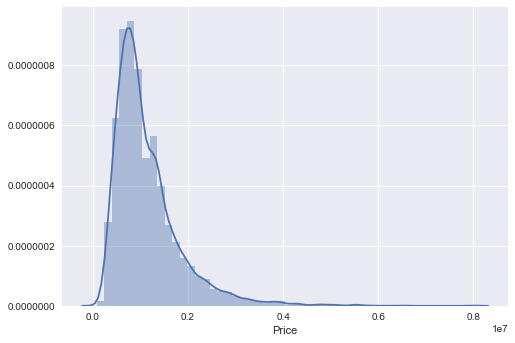

In [8]:
sns.distplot(df[df['Price'].notnull()]['Price'])
plt.show()

## 2. Feature Engineering

### Convert Suburub to lat and long

In [9]:
geo_file = pd.read_csv('suburb_geolocation.csv')
geo_file.head()

,postcode,suburb,state,dc,type,lat,lon
0,200,AUSTRALIAN NATIONAL UNIVERSITY,ACT,AUSTRALIAN NATIONAL UNI LPO,Post Office Boxes,-35.277272,149.117136
1,221,BARTON,ACT,NaN,LVR,-35.201372,149.095065
2,800,DARWIN,NT,DARWIN DELIVERY CENTRE,Delivery Area,-12.801028,130.955789
3,801,DARWIN,NT,DARWIN DELIVERY CENTRE,Post Office Boxes,-12.801028,130.955789
4,804,PARAP,NT,PARAP,Post Office Boxes,-12.432181,130.843310


In [10]:
victoria = geo_file[geo_file.state == 'VIC']
victoria.head()

,postcode,suburb,state,dc,type,lat,lon
5324,3000,MELBOURNE,VIC,CITY DELIVERY CENTRE,Delivery Area,-37.814563,144.970267
5325,3001,MELBOURNE,VIC,CITY MAIL PROCESSING CENTRE,Post Office Boxes,-38.365017,144.765920
5326,3002,EAST MELBOURNE,VIC,CITY DELIVERY CENTRE,Delivery Area,-37.816640,144.987811
5327,3003,WEST MELBOURNE,VIC,CITY DELIVERY CENTRE,Delivery Area,-37.806255,144.941123
5328,3004,MELBOURNE,VIC,CITY DELIVERY CENTRE,Delivery Area,-37.837324,144.976335


In [11]:
geolocation = pd.DataFrame(columns=['Latitude', 'Longitude'])
suburbs = df.Suburb
lats = []
longs = []
for suburb in suburbs:
    data = victoria[victoria.suburb == suburb.strip().upper()]
    latitude = data['lat'].values
    longitude = data['lon'].values
    lats.append(latitude[0]) if len(latitude) > 0 else None
    longs.append(longitude[0]) if len(longitude) > 0 else None

In [12]:
geolocation['Latitude'] = pd.Series(lats)
geolocation['Longitude'] = pd.Series(longs)
geolocation.head()

,Latitude,Longitude
0,-37.716897,145.006985
1,-37.765707,144.919163
2,-37.751819,145.045449
3,-37.762489,144.961176
4,-37.768904,144.830258


### Dummy variables for Type

In [13]:
house_type = pd.get_dummies(df['Type'], prefix='Type')
house_type.head()

,Type_h,Type_t,Type_u
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


### Dummy variables for Regionname

In [14]:
region = pd.get_dummies(df['Regionname'], prefix='Region')
region.head()

,Region_Eastern Metropolitan,Region_Eastern Victoria,Region_Northern Metropolitan,Region_Northern Victoria,Region_South-Eastern Metropolitan,Region_Southern Metropolitan,Region_Western Metropolitan,Region_Western Victoria
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0


### Assemble dataset

In [49]:
ready_columns = ['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize', 'Propertycount', 'YearBuilt', 'BuildingArea']
dataset = pd.concat([df[ready_columns], geolocation, house_type, region], axis=1, ignore_index=False)
dataset.head(5)

,Rooms,Price,Distance,Bathroom,Car,Landsize,Propertycount,YearBuilt,BuildingArea,Latitude,...,Type_t,Type_u,Region_Eastern Metropolitan,Region_Eastern Victoria,Region_Northern Metropolitan,Region_Northern Victoria,Region_South-Eastern Metropolitan,Region_Southern Metropolitan,Region_Western Metropolitan,Region_Western Victoria
0,3,810000.0,11.2,2,2,279,21650,NaN,NaN,-37.716897,...,0,0,0,0,1,0,0,0,0,0
1,2,801000.0,6.9,1,0,133,6232,NaN,NaN,-37.765707,...,0,0,0,0,0,0,0,0,1,0
2,3,1110000.0,9.5,1,2,730,790,NaN,NaN,-37.751819,...,0,0,1,0,0,0,0,0,0,0
3,3,1300000.0,5.2,1,3,484,7082,NaN,NaN,-37.762489,...,0,0,0,0,1,0,0,0,0,0
4,3,905000.0,10.5,1,4,697,4217,NaN,NaN,-37.768904,...,0,0,0,0,0,0,0,0,1,0


In [50]:
dataset.YearBuilt = dataset.YearBuilt.fillna(dataset.YearBuilt.median())
dataset.BuildingArea = dataset.BuildingArea.fillna(dataset.BuildingArea.median())

## 3. Training Data

In [51]:
with_price = dataset[dataset.Price.notnull()]
print(with_price.shape)
with_price.head()

(5291, 22)


,Rooms,Price,Distance,Bathroom,Car,Landsize,Propertycount,YearBuilt,BuildingArea,Latitude,...,Type_t,Type_u,Region_Eastern Metropolitan,Region_Eastern Victoria,Region_Northern Metropolitan,Region_Northern Victoria,Region_South-Eastern Metropolitan,Region_Southern Metropolitan,Region_Western Metropolitan,Region_Western Victoria
0,3,810000.0,11.2,2,2,279,21650,1970.0,123.0,-37.716897,...,0,0,0,0,1,0,0,0,0,0
1,2,801000.0,6.9,1,0,133,6232,1970.0,123.0,-37.765707,...,0,0,0,0,0,0,0,0,1,0
2,3,1110000.0,9.5,1,2,730,790,1970.0,123.0,-37.751819,...,0,0,1,0,0,0,0,0,0,0
3,3,1300000.0,5.2,1,3,484,7082,1970.0,123.0,-37.762489,...,0,0,0,0,1,0,0,0,0,0
4,3,905000.0,10.5,1,4,697,4217,1970.0,123.0,-37.768904,...,0,0,0,0,0,0,0,0,1,0


## 4. Training and validation data

In [52]:
from sklearn.model_selection import train_test_split
seed_num = 42
full_x = with_price.drop(['Price'], axis=1)
full_y = with_price['Price']

# avoid dummy variable trap
full_x = full_x.drop(['Region_Western Victoria'], axis=1)

train_x, valid_x, train_y, valid_y = train_test_split(full_x, full_y, test_size=0.3, random_state = seed_num)
print(train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)

(3703, 20) (3703,) (1588, 20) (1588,)


## 5. Modelling

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import LinearRegression, BayesianRidge, SGDRegressor

In [54]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
valid_x = sc.transform(valid_x)

In [55]:
seed_num = 42
models = {
    'gbr': GradientBoostingRegressor(random_state=seed_num),
    'rfg': RandomForestRegressor(random_state=seed_num),
    'etg': ExtraTreesRegressor(random_state=seed_num),
    'svr': SVR(kernel='rbf'),
    'lin-svr': LinearSVR(random_state=seed_num),
    'lin-reg': LinearRegression(),
    'bayes-reg': BayesianRidge(),
    'sgd': SGDRegressor(random_state=seed_num)
}

In [56]:
for name, model in models.items():
    print(name)
    model.fit(train_x, train_y)
    print(model.score(train_x, train_y), model.score(valid_x, valid_y), '\n')

gbr
0.818280731202 0.756208129244 

rfg
0.950351468387 0.724049038333 

etg
0.999975498667 0.728205772022 

svr
-0.0760531804976 -0.0999539148845 

lin-svr
-2.71218270724 -2.36874950637 

lin-reg
0.611276466367 0.601824051258 

bayes-reg
0.611260659215 0.6016476213 

sgd
0.608203957504 0.599715855372 



In [57]:
pred_y = models['svr'].predict(valid_x)
r2_score(valid_y, pred_y)

-0.099953914884519213

Negative R2 score means the models perform arbitrarily WORSE!

In [58]:
pd.DataFrame([models['rfg'].feature_importances_], columns=list(full_x))

,Rooms,Distance,Bathroom,Car,Landsize,Propertycount,YearBuilt,BuildingArea,Latitude,Longitude,Type_h,Type_t,Type_u,Region_Eastern Metropolitan,Region_Eastern Victoria,Region_Northern Metropolitan,Region_Northern Victoria,Region_South-Eastern Metropolitan,Region_Southern Metropolitan,Region_Western Metropolitan
0,0.239016,0.122944,0.045335,0.019627,0.120483,0.03841,0.030983,0.040515,0.030728,0.030654,0.002314,0.001339,0.084635,0.009967,0.000003,0.000963,0.0,0.001376,0.180059,0.000652


From this modelling process, there ensemble models seem to perform the best.

## 6. Performance Tuning

In [59]:
from sklearn.grid_search import GridSearchCV

In [60]:
# # Tune ETG
# params = {
#     'n_estimators': [10, 100, 500, 1000],
#     'max_features': ['auto', 'sqrt', 'log2']
# }
# clf = GridSearchCV(ExtraTreesRegressor(random_state=seed_num), params)
# clf.fit(train_x, train_y)

{'max_features': 'auto', 'n_estimators': 1000}

In [61]:
# # Tune RFG
# params = {
#     'n_estimators': [10, 100, 500, 1000],
#     'max_features': ['auto', 'sqrt', 'log2']
# }
# clf = GridSearchCV(RandomForestRegressor(random_state=seed_num), params)
# clf.fit(train_x, train_y)

{'max_features': 'sqrt', 'n_estimators': 1000}

In [62]:
# # Tune GBR
# params = {
#     'n_estimators': [10, 100, 500, 1000],
#     'learning_rate': [0.01, 0.1, 0.5, 0.75, 1],
#     'loss': ['ls', 'lad', 'huber', 'quantile'],
#     'alpha': [0.5, 0.75, 0.9]
# }
# clf = GridSearchCV(GradientBoostingRegressor(random_state=seed_num), params)
# clf.fit(train_x, train_y)

{'alpha': 0.5, 'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 500}

## 7. Feature selection

In [63]:
from sklearn.feature_selection import RFECV
estimator = GradientBoostingRegressor()
selector = RFECV(estimator, cv=5)
selector.fit(train_x, train_y)

RFECV(cv=5,
   estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [64]:
pd.DataFrame([selector.support_], columns=list(full_x))

,Rooms,Distance,Bathroom,Car,Landsize,Propertycount,YearBuilt,BuildingArea,Latitude,Longitude,Type_h,Type_t,Type_u,Region_Eastern Metropolitan,Region_Eastern Victoria,Region_Northern Metropolitan,Region_Northern Victoria,Region_South-Eastern Metropolitan,Region_Southern Metropolitan,Region_Western Metropolitan
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True,True,True


## 8. Predict on training and validation data

In [65]:
train_x.shape

(3703, 20)

In [66]:
etr = ExtraTreesRegressor(max_features='auto', n_estimators=1000, random_state=seed_num)
etr.fit(train_x, train_y)
print(etr.score(train_x, train_y), etr.score(valid_x, valid_y))

0.999975498667 0.746316385426


In [67]:
rfr = RandomForestRegressor(max_features='sqrt', n_estimators=1000, random_state=seed_num)
rfr.fit(train_x, train_y)
print(rfr.score(train_x, train_y), rfr.score(valid_x, valid_y))

0.967710442991 0.740936566515


In [68]:
gbr = GradientBoostingRegressor(alpha=0.5, learning_rate=0.1, loss='ls', n_estimators=500, random_state=seed_num)
gbr.fit(train_x, train_y)
print(gbr.score(train_x, train_y), gbr.score(valid_x, valid_y))

0.900969423218 0.787029776963


## 9. Predict on test data

In [69]:
test_data = dataset[dataset.Price.isnull()]
print(test_data.shape)
test_data.head()

(5291, 22)


,Rooms,Price,Distance,Bathroom,Car,Landsize,Propertycount,YearBuilt,BuildingArea,Latitude,...,Type_t,Type_u,Region_Eastern Metropolitan,Region_Eastern Victoria,Region_Northern Metropolitan,Region_Northern Victoria,Region_South-Eastern Metropolitan,Region_Southern Metropolitan,Region_Western Metropolitan,Region_Western Victoria
5291,2,NaN,2.5,1,0,162,4019,1900.0,91.0,-37.856902,...,0,0,0,0,1,0,0,0,0,0
5292,2,NaN,7.7,1,0,163,8989,1890.0,92.0,-37.816178,...,0,0,0,0,0,0,0,1,0,0
5293,3,NaN,8.4,1,1,206,8801,1980.0,110.0,-38.118300,...,1,0,0,0,0,0,0,1,0,0
5294,3,NaN,6.3,1,1,217,4836,1888.0,116.0,-37.800917,...,0,0,0,0,0,0,0,1,0,0
5295,3,NaN,7.5,1,1,211,6482,1990.0,120.0,-37.932910,...,0,0,0,0,0,0,0,1,0,0


In [70]:
test_data = test_data.drop(['Price', 'Region_Western Victoria'], axis=1)
test_data.shape
test_data.head()

,Rooms,Distance,Bathroom,Car,Landsize,Propertycount,YearBuilt,BuildingArea,Latitude,Longitude,Type_h,Type_t,Type_u,Region_Eastern Metropolitan,Region_Eastern Victoria,Region_Northern Metropolitan,Region_Northern Victoria,Region_South-Eastern Metropolitan,Region_Southern Metropolitan,Region_Western Metropolitan
5291,2,2.5,1,0,162,4019,1900.0,91.0,-37.856902,144.897698,1,0,0,0,0,1,0,0,0,0
5292,2,7.7,1,0,163,8989,1890.0,92.0,-37.816178,144.889774,1,0,0,0,0,0,0,0,1,0
5293,3,8.4,1,1,206,8801,1980.0,110.0,-38.118300,145.203099,0,1,0,0,0,0,0,0,1,0
5294,3,6.3,1,1,217,4836,1888.0,116.0,-37.800917,144.979165,1,0,0,0,0,0,0,0,1,0
5295,3,7.5,1,1,211,6482,1990.0,120.0,-37.932910,145.033718,1,0,0,0,0,0,0,0,1,0


In [71]:
pd.isnull(test_data).sum()

Rooms                                  0
Distance                               0
Bathroom                               0
Car                                    0
Landsize                               0
Propertycount                          0
YearBuilt                              0
BuildingArea                           0
Latitude                             215
Longitude                            215
Type_h                                 0
Type_t                                 0
Type_u                                 0
Region_Eastern Metropolitan            0
Region_Eastern Victoria                0
Region_Northern Metropolitan           0
Region_Northern Victoria               0
Region_South-Eastern Metropolitan      0
Region_Southern Metropolitan           0
Region_Western Metropolitan            0
dtype: int64

In [72]:
test_data[test_data['Latitude'].isnull()].head()

,Rooms,Distance,Bathroom,Car,Landsize,Propertycount,YearBuilt,BuildingArea,Latitude,Longitude,Type_h,Type_t,Type_u,Region_Eastern Metropolitan,Region_Eastern Victoria,Region_Northern Metropolitan,Region_Northern Victoria,Region_South-Eastern Metropolitan,Region_Southern Metropolitan,Region_Western Metropolitan
10367,1,7.8,1,1,0,1808,1970.0,36.0,NaN,NaN,0,0,1,0,0,0,0,0,0,1
10368,3,4.5,2,1,273,7717,1890.0,125.0,NaN,NaN,1,0,0,0,0,0,0,0,1,0
10369,4,12.4,3,2,332,5420,2013.0,198.0,NaN,NaN,0,1,0,1,0,0,0,0,0,0
10370,3,6.3,2,1,205,4836,1910.0,116.0,NaN,NaN,1,0,0,0,0,0,0,0,1,0
10371,1,6.1,1,1,2879,13240,1967.0,49.0,NaN,NaN,0,0,1,0,0,0,0,0,1,0


In [73]:
# filling in empty cell
test_data.Latitude = test_data.Latitude.fillna(test_data.Latitude.mean())
test_data.Longitude = test_data.Longitude.fillna(test_data.Longitude.mean())
pd.isnull(test_data).sum()

Rooms                                0
Distance                             0
Bathroom                             0
Car                                  0
Landsize                             0
Propertycount                        0
YearBuilt                            0
BuildingArea                         0
Latitude                             0
Longitude                            0
Type_h                               0
Type_t                               0
Type_u                               0
Region_Eastern Metropolitan          0
Region_Eastern Victoria              0
Region_Northern Metropolitan         0
Region_Northern Victoria             0
Region_South-Eastern Metropolitan    0
Region_Southern Metropolitan         0
Region_Western Metropolitan          0
dtype: int64

In [74]:
test_x = sc.transform(test_data)
test_x

array([[-0.90711211, -1.46867384, -0.68880136, ..., -0.13471015,
        -0.79815215, -0.51741331],
       [-0.90711211, -0.33762887, -0.68880136, ..., -0.13471015,
         1.25289394, -0.51741331],
       [ 0.11170383, -0.18537282, -0.68880136, ..., -0.13471015,
         1.25289394, -0.51741331],
       ..., 
       [-0.90711211,  0.81516696, -0.68880136, ..., -0.13471015,
         1.25289394, -0.51741331],
       [ 0.11170383, -1.01190568, -0.68880136, ..., -0.13471015,
         1.25289394, -0.51741331],
       [-1.92592804, -0.33762887, -0.68880136, ..., -0.13471015,
         1.25289394, -0.51741331]])

In [75]:
predictions = []
predictions.append(etr.predict(test_x))
predictions.append(rfr.predict(test_x))
predictions.append(gbr.predict(test_x))
predictions

[array([ 1161692.   ,   977080.   ,  1131219.5  , ...,   744236.   ,
         1690943.   ,   411699.001]),
 array([ 1181333.5       ,  1237708.5       ,  1095774.5       , ...,
          717106.        ,  1654889.5       ,   455626.33533333]),
 array([ 1150479.1808889 ,  1206870.17012375,   953647.35542569, ...,
          450080.81509203,  1717327.29548487,   412539.71360438])]

In [76]:
all_predictions = pd.DataFrame(predictions, index=['etr', 'rfr', 'gbr'], columns=test_data.index)
all_predictions

,5291,5292,5293,5294,5295,5296,5297,5298,5299,5300,...,10572,10573,10574,10575,10576,10577,10578,10579,10580,10581
etr,1.161692e+06,9.770800e+05,1.131220e+06,1.654630e+06,1.554244e+06,750389.500000,772996.500000,2.060271e+06,1.144512e+06,858173.478000,...,401360.900000,1.627126e+06,2.639849e+06,1.388220e+06,1.407877e+06,1.910319e+06,1.404610e+06,744236.000000,1.690943e+06,411699.001000
rfr,1.181334e+06,1.237708e+06,1.095774e+06,1.565649e+06,1.399850e+06,798248.420000,880274.300000,1.918875e+06,1.140865e+06,867903.328000,...,399749.600000,1.569710e+06,2.417413e+06,1.261736e+06,1.262296e+06,1.866562e+06,1.406848e+06,717106.000000,1.654890e+06,455626.335333
gbr,1.150479e+06,1.206870e+06,9.536474e+05,1.737757e+06,1.328688e+06,729398.183004,903097.616657,1.944381e+06,1.207835e+06,901730.957257,...,412719.794415,1.621948e+06,2.758946e+06,1.307019e+06,1.386946e+06,2.586726e+06,1.514714e+06,450080.815092,1.717327e+06,412539.713604


In [77]:
prices = all_predictions.mean().values

In [78]:
ids = all_predictions.columns.tolist()
ids = map(lambda id: id+1, ids)

In [79]:
final_result = pd.DataFrame()
final_result['HouseID'] = pd.Series(ids)
final_result['Price'] = prices

In [80]:
final_result.head()

,HouseID,Price
0,5292,1.164502e+06
1,5293,1.140553e+06
2,5294,1.060214e+06
3,5295,1.652678e+06
4,5296,1.427594e+06


In [81]:
final_result.to_csv('./prediction.csv', index=False)